In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('D3.csv')
X1 = df.values[:, 0]               
X2 = df.values[:, 1]                
X3 = df.values[:, 2]               
y = df.values[:, 3]                
m = len(y)
print('X1 = ', X1[: 5]) 
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
print('m = ', m)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


In [107]:
X_0 = np.ones((m, 1))            
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [108]:
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])

X_1 =  [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]
X_2 =  [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]
X_3 =  [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]]


In [109]:
X = np.hstack((X_0, X_1, X_2, X_3))
X [: 5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [110]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [111]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [112]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [113]:
cost = compute_cost(X, y, theta)
cost

5.524438459196242

In [114]:
theta = [0., 0., 0., 0.]
iterations = 1500;
alpha = 0.02

In [115]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)

Final value of theta= [ 5.0540181  -1.96696891  0.57555136 -0.2274693 ]
cost_history = [4.9441034  4.58765223 4.34920128 ... 0.74209818 0.74208371 0.74206929]


Text(0.5, 1.0, 'Convergence of gradient descent')

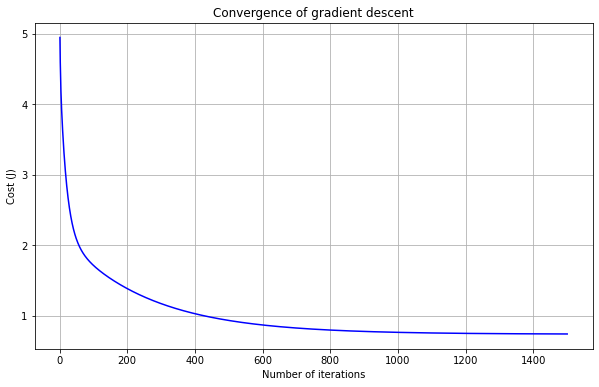

In [116]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [117]:
X_new = ([1, 1, 1, 1],
        [1, 2, 0, 4],
        [1, 3, 2, 1])
       
Predictions_new = np.dot(X_new, theta)
Predictions_new

array([3.43513125, 0.21020309, 0.0767448 ])